# Teoría de grafos

## Ambiente de Trabajo

De ahora en adelante vamos a estar trabajando constantemente con Python y con las herramientas cientificas que el ecosistema de este lenguaje nos provee, por tal razón, les recomiendo que se vayan familizariando con la herramienta.

Es importante que aprendamos a trabajar con lógica básica de programación y que familizarecen con algunas estructuras de datos como las listas y los diccionarios

## Revisar en notion la teoría

[notion](https://www.notion.so/unimetopti2/Unidad-III-5d043d7d2eff40b68b8fc3abffef7ed1)
## Instalar herramientas

Si todo salio bien, deberían estar trabajando en un ambiente cientifico de python con el launcher de Anaconda, que les permite tener accesos entre muchas cosas a estos "cuadernos" llamados _jupyter noteboook_ en donde podrán ejecutar los ejemplos de clase y realizar sus ejercicios, pero antes de comenzar hay que asegurarnos de tener todo en orden, por eso les pido que ejecuten la siguiente celda y que revisen que todo esten en orden

In [2]:
!python --version && python3 --version
print('*'*30)
!python -m pip show scipy matplotlib numpy
!pip install decorator==4.3

Python 3.8.11
Python 3.8.11
******************************
Name: scipy
Version: 1.7.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: /Users/zoomelectrico/opt/anaconda3/lib/python3.8/site-packages
Requires: numpy
Required-by: statsmodels, seaborn, scikit-learn, scikit-image
---
Name: matplotlib
Version: 3.4.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/zoomelectrico/opt/anaconda3/lib/python3.8/site-packages
Requires: python-dateutil, pillow, cycler, kiwisolver, pyparsing, numpy
Required-by: seaborn, scikit-image
---
Name: numpy
Version: 1.20.3
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /Users/zoomelectrico/opt/anaconda3/lib/python3.8/site-

## Graficar un grafo

Vamos a ver como graficar un Grafo/Digrafo en python, para ello vamos a utilizar una librería llamada [networkx](https://networkx.org/) la cual utiliza a [matplotlib](https://matplotlib.org/) una de las liberías mas utilizadas en python para graficar. _Networkx_ también nos va a permitir trabajar con varios algoritmos comunes de grafos.

Entonces para empezar, hay que considerar lo que tiene la siguiente celda

In [3]:
%matplotlib inline 
import networkx as nx
import matplotlib.pyplot as plt

En la celda anterior estamos importando las libreria que vamos a utilizar y tendremos acceso a ellas a través de los nombres `nx` y `plt` adicionalmente tenemos el comando `%matplotlib inline` que es un comando especial de los _jupyter notebooks_ que nos indica que las gráfica que matplotlib genere las va a colocar en inlinea dentro del notebook

Lo primero que vamos a hacer es crea un objeto que contenga la información de nuestro grafo, en este caso al ser un Digrafo tendremos que usar la clase [`nx.DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) para crear nuestro digrafo.

Después de ello procederemos a agregar los nodos utilizando el método `add_nodes_from` en donde pasaremos la lista de nodos (el conjunto $V$ de nuestro par ordenado $G$)

Luego, utilizaremos el método `add_edges_from` agregaremos los arcos (el conjunto $E$ del par $G$) el cual esta compuesto por una lista de tuplas en donde la primera posición de la tupla $\left(u,v\right)$ es el origen ($u$) y la segunda el destino ($v$)

Por último procedemos a graficar, la estructura utilizando el método [`nx.draw`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html), que recibe como parametros un grafo y una [lista opciones](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) para la gráfica


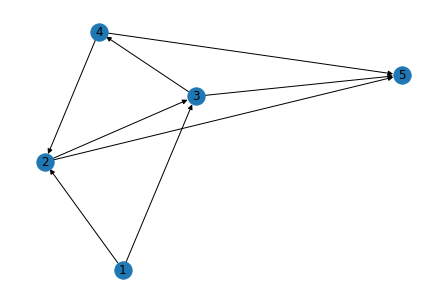

In [5]:
graph = nx.DiGraph()
graph.add_nodes_from([1,2,3,4,5])
graph.add_edges_from([(1,2), (1,3)])
graph.add_edges_from([(2,3), (2,5)])
graph.add_edges_from([(3,4), (3,5)])
graph.add_edges_from([(4,2), (4,5)])

nx.draw(graph, with_labels = True)

🎉🎉🎉 Listo ya sabemos como graficar un grafo utilizando la librería _networkx_

## Árbol de Expansión mínima

El algoritmo llamado, árbol de expansión mínima o mínimo árbol de expansión, une a los nodos de una red usando el mínimo total de unidades necesarias para conectar a los nodos de un red. Un ejemplo clásico, es el problema pavimentar diferentes caminos que unan a todas la ciudades de un conjunto de poblaciones, bien sea de manera directa o indirecta (pasado por diferentes ciudades), para este ejemplo, el algoritmo provee el costo mínimo para construir las carreteras. (Taha, 2017)

De acuerdo con Hillier y Lieberman, (2010) el problema del árbol de expansión mínima se puede caracterizar de la siguiente forma:

1. Se tienen los nodos de una red pero no sus arcos definitivos, en vez se proporcionan los arcos potenciales y el costo de cada arco en la red.
2. Se busca diseñar un red con suficientes arcos para conectar todos los nodos de la red
3. El objetivo es diseñar dicha red minimizando el costo entre los arcos

Hillier y Lieberman (2010; pág. 340) introducen el siguiente dato importante al momento de realizar esta clase de problemas "Una red con n nodos requiere de sólo (n – 1) arcos para proporcionar una trayectoria entre cada par de nodos. No deben usarse más arcos puesto que ello aumentaría, sin necesidad, la longitud total de las ligaduras seleccionadas."

### Ejemplo Hillier y Lieberman (2010, pág. 342)

![grafo](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fac8f585d-3802-4641-b9bf-7fea20f15021%2FScreenshot_from_2020-07-24_22-10-49_1.png?table=block&id=1dcebc0c-5902-4428-bb7c-bba8d9eddfd6&spaceId=42f53fcc-e6ec-4a21-9974-dff3ba50e637&width=1580&userId=7994855b-8314-4df8-abb9-04ba5ee1488c&cache=v2)

Vamos a resolver este ejemplo utilizando 2 librerías adicionalmente en [notion]() pueden ver una implementación del algoritmo.

Utilizando NetworkX, vamos a crear un objeto grafo al que llamaremos _G_ y utilizando el método `add_edge` vamos a agregar los arcos al mismo, y además los pesos de estos de esta manera tendremos la representación del mismo grafo del problema

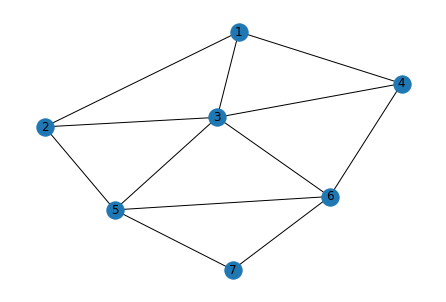

In [6]:
# Utilizando NetworkX
G = nx.Graph()

G.add_edge(1, 2, weight=2, size=2)
G.add_edge(1, 3, weight=5, size=5)
G.add_edge(1, 4, weight=4, size=4)

G.add_edge(2, 3, weight=2, size=2)
G.add_edge(2, 5, weight=7, size=7)

G.add_edge(3, 4, weight=1, size=1)
G.add_edge(3, 5, weight=3, size=3)
G.add_edge(3, 6, weight=4, size=4)

G.add_edge(4, 6, weight=4, size=4)

G.add_edge(5, 6, weight=1, size=1)
G.add_edge(5, 7, weight=7, size=7)

G.add_edge(6, 7, weight=7, size=7)

nx.draw(G, with_labels = True)

Luego haciendo uso del método [`nx.minimum_spanning_tree`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.mst.minimum_spanning_tree.html#networkx.algorithms.tree.mst.minimum_spanning_tree) vamos a resolver el problema. Notesé que este método toma un parámetro que se llama _algorithm_ el cual nos permite escoger con cual algoritmo deseamos encontrar la solución las opciones para este valor son `kruskal`, `prim`, o `boruvka`.

In [7]:
T = nx.minimum_spanning_tree(G, algorithm='prim')
sorted(T.edges(data=True))

[(1, 2, {'weight': 2, 'size': 2}),
 (2, 3, {'weight': 2, 'size': 2}),
 (3, 4, {'weight': 1, 'size': 1}),
 (3, 5, {'weight': 3, 'size': 3}),
 (5, 6, {'weight': 1, 'size': 1}),
 (5, 7, {'weight': 7, 'size': 7})]

Este método devuelve, otro Grafo que representa al MST del problema, podemos utilizar el método `edges` para obtener los arcos del arbol y luego utilizar la función [sorted](https://www.programiz.com/python-programming/methods/built-in/sorted) de python para ver el orden de los nodos, también podemos utilizar el método draw para ver el mst que genero la librería

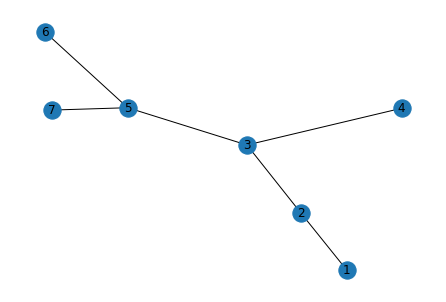

In [9]:
nx.draw(T, with_labels = True)

Como segundo método vamos a utilizar una de las librerías más utilizadas en la comunidad de python [scipy](https://docs.scipy.org/) para resolver los algoritmos de grafos con `scipy` es necesario utilizar una matriz de adyacencia la cual en nuestro caso nombraremos X y utilizaremos la función [`csr_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) de `scipy.sparse` para poder almacener la información de esta dentro de un objeto que los algoritmos de scipy entienda.

Luego podremos utilizar la función [`minimum_spanning_tree`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.minimum_spanning_tree.html) de `scipy.sparse.csgraph` para resolver el problema este método devuelve otra matriz la cual deberemos imprimir para ver el mst del problema, para ello

In [10]:
# Utilizando Scipy
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
X = csr_matrix([
    #0,A,B,C,D,E,T
    [2,5,4,0,0,0,0], #O
    [2,0,2,0,7,0,0], #A
    [5,2,0,1,4,3,0], #B
    [4,0,1,0,0,4,0], #C
    [0,7,4,0,0,1,5], #D
    [0,0,3,4,1,0,7], #E
    [0,0,0,0,0,0,0]  #T
])
tree = minimum_spanning_tree(X)

print(tree.toarray().astype(int))

[[0 0 0 0 0 0 0]
 [2 0 2 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 5]
 [0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0]]


🎉🎉🎉 Listo ya sabemos resolver un árbol de expansión mínima con python

**Nota**: si quieren saber que significa las siglas csr hacen referencia a _Compressed Sparse Row_ y puede leer un poco más [acá](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_(CSR,_CRS_or_Yale_format))